In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot, lag_plot
import pandas
from scipy import stats
import os
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR

/home/vgoncalves/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
filename = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname('treinamento.txt'))) + '/treinamento-1.txt'

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [5]:
series = pandas.read_csv(filename,  header=None)

In [6]:
series

,0
0,0.534824
1,0.427926
2,0.633759
3,0.196700
4,0.922618
5,-0.702448
6,0.013135
7,0.999655
8,-0.998620
9,-0.994484


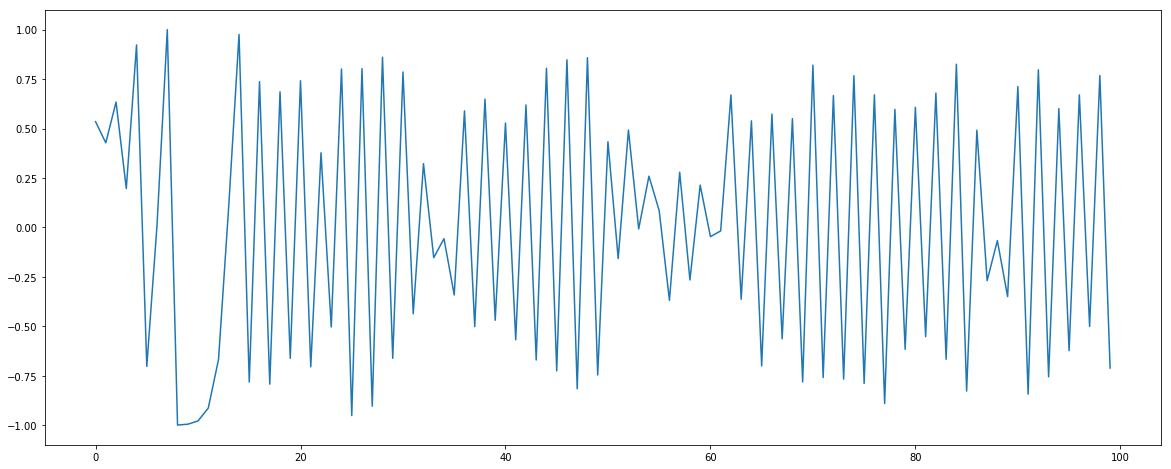

In [15]:
plt.plot(series[0:100])
plt.show()

In [8]:
dataframe = pandas.concat([series.shift(5),series.shift(4),series.shift(3),series.shift(2),series.shift(1), series], axis=1)
dataframe.columns = ['t-5','t-4','t-3','t-2','t-1', 't+1']
result = dataframe.corr()
print(result)

          t-5       t-4       t-3       t-2       t-1       t+1
t-5  1.000000 -0.342799  0.307587 -0.281403  0.249178 -0.203717
t-4 -0.342799  1.000000 -0.342213  0.305309 -0.279332  0.249740
t-3  0.307587 -0.342213  1.000000 -0.342231  0.305383 -0.279086
t-2 -0.281403  0.305309 -0.342231  1.000000 -0.343485  0.304058
t-1  0.249178 -0.279332  0.305383 -0.343485  1.000000 -0.342223
t+1 -0.203717  0.249740 -0.279086  0.304058 -0.342223  1.000000


In [9]:
dataframe

,t-5,t-4,t-3,t-2,t-1,t+1
0,NaN,NaN,NaN,NaN,NaN,0.534824
1,NaN,NaN,NaN,NaN,0.534824,0.427926
2,NaN,NaN,NaN,0.534824,0.427926,0.633759
3,NaN,NaN,0.534824,0.427926,0.633759,0.196700
4,NaN,0.534824,0.427926,0.633759,0.196700,0.922618
5,0.534824,0.427926,0.633759,0.196700,0.922618,-0.702448
6,0.427926,0.633759,0.196700,0.922618,-0.702448,0.013135
7,0.633759,0.196700,0.922618,-0.702448,0.013135,0.999655
8,0.196700,0.922618,-0.702448,0.013135,0.999655,-0.998620
9,0.922618,-0.702448,0.013135,0.999655,-0.998620,-0.994484


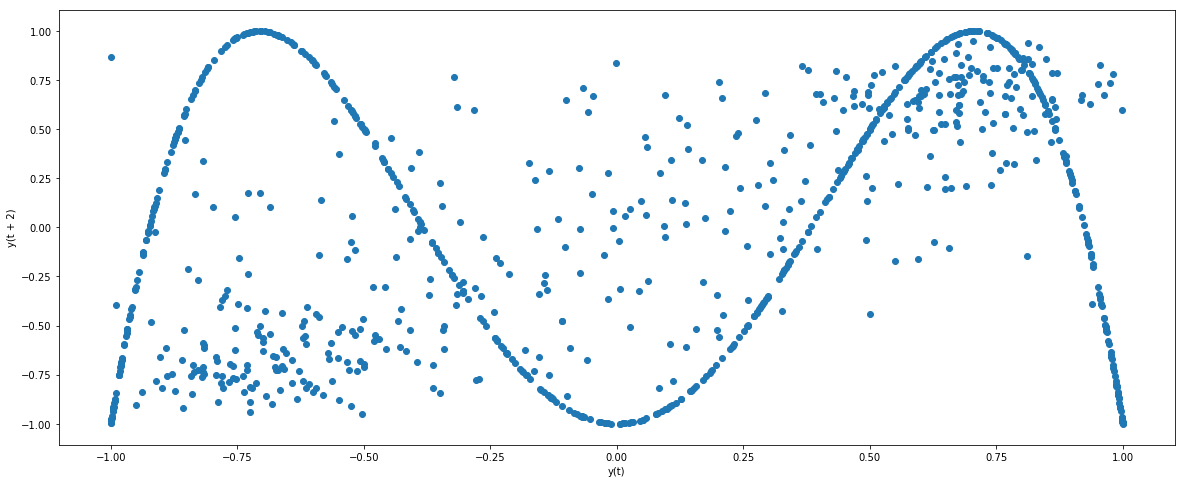

In [25]:
lag_plot(series,lag=2)
plt.show()

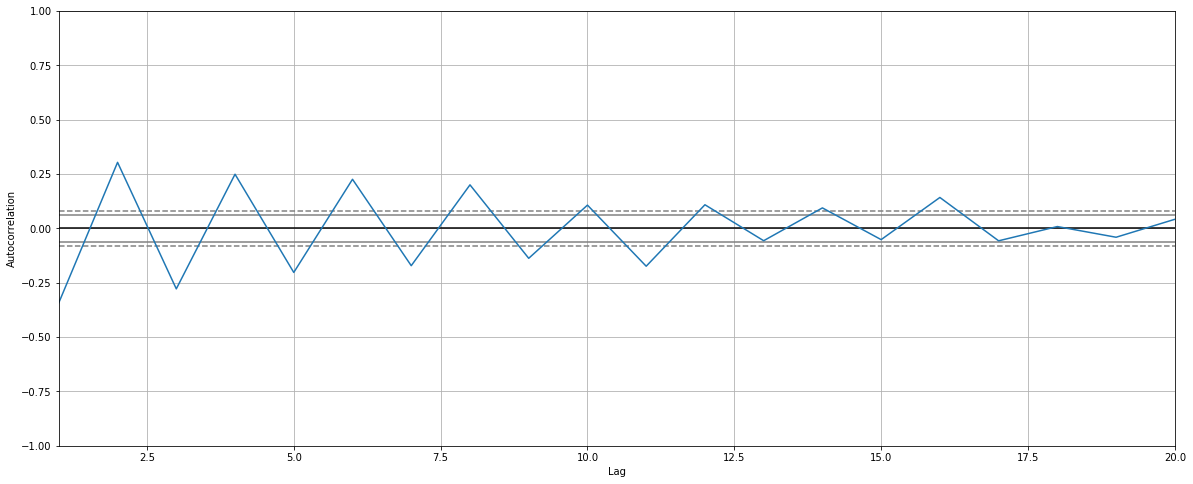

In [11]:
autocorrelation_plot(series)
plt.xlim(1, 20)
plt.show()

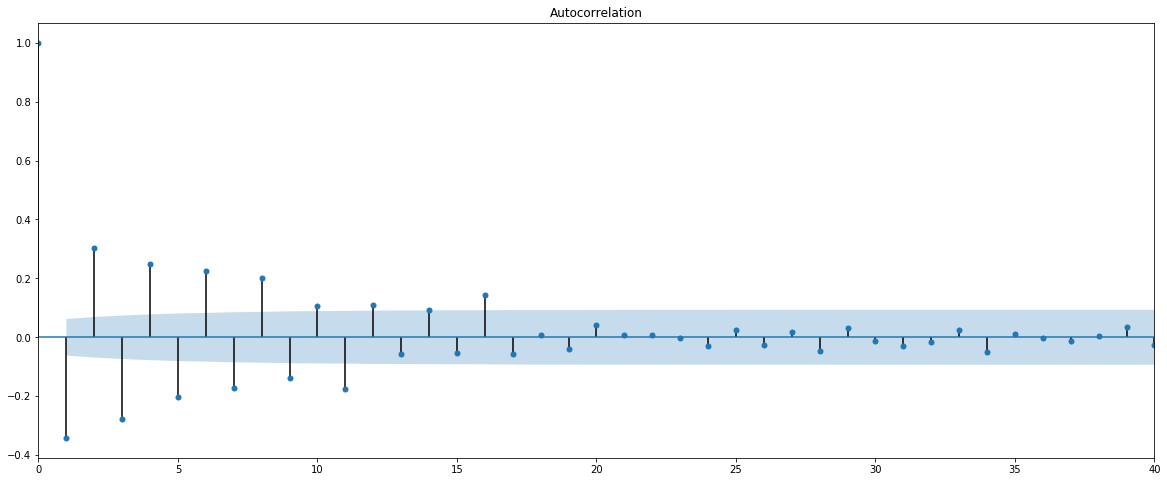

In [12]:
plot_acf(series, lags=200)
plt.xlim(0, 40)
plt.show()

In [13]:
model = AR(series.values)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)

Lag: 21
